In [ ]:
pip install GEOparse

In [1]:
import GEOparse

# 指定一个可写的目标文件夹，例如当前工作目录下的 "GSE36059_data" 文件夹
dest_folder = "./GSE21374_data"

gse = GEOparse.get_GEO("GSE21374")

19-Mar-2025 15:44:59 DEBUG utils - Directory ./ already exists. Skipping.
19-Mar-2025 15:44:59 INFO GEOparse - File already exist: using local version.
19-Mar-2025 15:44:59 INFO GEOparse - Parsing ./GSE21374_family.soft.gz: 
19-Mar-2025 15:44:59 DEBUG GEOparse - DATABASE: GeoMiame
19-Mar-2025 15:44:59 DEBUG GEOparse - SERIES: GSE21374
19-Mar-2025 15:44:59 DEBUG GEOparse - PLATFORM: GPL570
C:\Users\ajxxs\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\GEOparse\GEOparse.py:401: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  return read_csv(StringIO(data), index_col=None, sep="\t")
19-Mar-2025 15:45:00 DEBUG GEOparse - SAMPLE: GSM533921
19-Mar-2025 15:45:00 DEBUG GEOparse - SAMPLE: GSM533922
19-Mar-2025 15:45:00 DEBUG GEOparse - SAMPLE: GSM533923
19-Mar-2025 15:45:00 DEBUG GEOparse - SAMPLE: GSM533924
19-Mar-2025 15:45:01 DEBUG GEOparse - SAMPLE: GSM533925
19-

In [2]:
print("Sample size：", len(gse.gsms))  # gsms stores all samples (GSM)
print(gse.gsms.keys())            # You can see the ID of each GSM

Sample size： 282
dict_keys(['GSM533921', 'GSM533922', 'GSM533923', 'GSM533924', 'GSM533925', 'GSM533926', 'GSM533927', 'GSM533928', 'GSM533929', 'GSM533930', 'GSM533931', 'GSM533932', 'GSM533933', 'GSM533934', 'GSM533935', 'GSM533936', 'GSM533937', 'GSM533938', 'GSM533939', 'GSM533940', 'GSM533941', 'GSM533942', 'GSM533943', 'GSM533944', 'GSM533945', 'GSM533946', 'GSM533947', 'GSM533948', 'GSM533949', 'GSM533950', 'GSM533951', 'GSM533952', 'GSM533953', 'GSM533954', 'GSM533955', 'GSM533956', 'GSM533957', 'GSM533958', 'GSM533959', 'GSM533960', 'GSM533961', 'GSM533962', 'GSM533963', 'GSM533964', 'GSM533965', 'GSM533966', 'GSM533967', 'GSM533968', 'GSM533969', 'GSM533970', 'GSM533971', 'GSM533972', 'GSM533973', 'GSM533974', 'GSM533975', 'GSM533976', 'GSM533977', 'GSM533978', 'GSM533979', 'GSM533980', 'GSM533981', 'GSM533982', 'GSM533983', 'GSM533984', 'GSM533985', 'GSM533986', 'GSM533987', 'GSM533988', 'GSM533989', 'GSM533990', 'GSM533991', 'GSM533992', 'GSM533993', 'GSM533994', 'GSM533995

In [ ]:
print(gse.metadata)  # View meta-information at the GSE level

{'title': ['Expression data from human renal allograft biopsies'], 'geo_accession': ['GSE21374'], 'status': ['Public on May 24 2010'], 'submission_date': ['Apr 17 2010'], 'last_update_date': ['Mar 25 2019'], 'pubmed_id': ['20501945'], 'summary': ['Kidney transplants that develop dysfunction or proteinuria after one year post transplant are at considerable risk for progression to renal failure. Identifying the molecules associated with graft failure could potentially lead to interventions that would slow the progression of organ failure.', 'We analyzed the relationship between gene expression in late biopsies for cause in human kidney transplants and subsequent graft loss, and assessed the predictive value of gene expression. We evaluated the performance of these genes in an independent , and in a population of early biopsies that have a very low risk of subsequent graft failure.'], 'overall_design': ['All consenting renal transplant patients undergoing biopsies for cause as standard of

In [3]:
import pandas as pd

# 创建空的 DataFrame 用来合并所有样本
expression_data = None

for gsm_name, gsm in gse.gsms.items():
    # gsm.table 通常是一个DataFrame，具体列名取决于平台类型、GEO数据格式
    # 常见的列名包括: ID_REF, VALUE, ...
    # 可以通过 gsm.table.columns 查看有哪些列

    # 举例：如果在 gsm.table 中，"ID_REF" 是探针ID，"VALUE" 是信号值
    df_sample = gsm.table[["ID_REF", "VALUE"]].copy()
    df_sample.columns = ["Probe", gsm_name]  # 重命名列，后者为样本名

    if expression_data is None:
        expression_data = df_sample
    else:
        # 按探针ID合并
        expression_data = pd.merge(expression_data, df_sample, on="Probe", how="outer")

# expression_data 的行数是探针数(或基因数)，列数是1（探针）+样本数
# 将 Probe 设为行索引
expression_data.set_index("Probe", inplace=True)

# 至此, expression_data 的列即各GSM样本，行是探针ID。

In [ ]:
expression_data

,GSM533921,GSM533922,GSM533923,GSM533924,GSM533925,GSM533926,GSM533927,GSM533928,GSM533929,GSM533930,...,GSM534193,GSM534194,GSM534195,GSM534196,GSM534197,GSM534198,GSM534199,GSM534200,GSM534201,GSM534202
Probe,,,,,,,,,,,,,,,,,,,,,
1007_s_at,9.977242,10.528307,10.676130,9.586508,9.979894,10.124071,10.179726,9.713284,9.800436,9.833937,...,9.508370,10.231449,9.999981,10.281044,9.480034,9.915120,10.144107,10.561913,10.179040,9.801515
1053_at,6.600568,6.488367,6.651939,6.141822,6.097477,6.750505,6.124551,6.179456,6.214171,6.486297,...,6.336555,6.787939,6.091758,7.313873,6.062129,6.624997,6.357931,6.496042,6.318934,6.209618
117_at,5.785312,5.658249,5.856184,5.866988,5.563888,5.757543,5.826591,5.640177,5.425478,5.870177,...,6.107833,7.098930,6.152239,5.911540,5.304020,5.568316,5.652100,5.696330,6.072288,5.657939
121_at,10.792120,10.973320,10.669966,10.342068,10.622161,10.620599,10.750809,10.338937,10.494150,10.224961,...,10.233884,10.623967,10.445553,10.353798,10.215773,10.438484,10.353695,11.125695,10.237774,10.358064
1255_g_at,3.136564,3.228242,2.907612,3.091361,3.055088,2.996213,3.014628,3.320329,3.166117,3.074369,...,3.266948,3.005705,3.184832,3.106395,3.063354,3.103627,3.146691,3.236582,3.112964,3.134502
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AFFX-r2-Ec-bioC-5_at,9.559851,9.784476,9.569640,9.697052,9.370505,9.279126,9.809913,9.294770,9.744995,9.435380,...,10.004761,9.222347,9.404451,9.160838,9.099752,9.072026,9.008347,9.151547,9.670360,9.664537
AFFX-r2-Ec-bioD-3_at,11.928238,12.336352,12.116085,12.001332,11.958363,11.721852,12.284938,11.905357,12.314785,11.921453,...,12.279727,11.750869,11.862270,11.672056,11.632682,11.555894,11.632159,11.830302,12.130981,12.193851
AFFX-r2-Ec-bioD-5_at,11.583730,11.898083,11.832005,11.741060,11.536944,11.367607,11.913841,11.512185,11.876466,11.546977,...,11.886732,11.397206,11.513621,11.329250,11.300848,11.048639,11.113692,11.330476,11.740694,11.828750


In [4]:
# 4. 读取平台注释表，将表达矩阵与基因注释信息相对应
if len(gse.gpls) > 0:
    gpl_name = list(gse.gpls.keys())[0]  # 若只有1个平台，可直接用
    gpl = gse.gpls[gpl_name]
    gpl_table = gpl.table.copy()

    # 根据平台文件实际列名选取
    # 比如: "ID", "Gene Symbol", "ENTREZ_GENE_ID" ...
    # 使用 get 方法避免列名不存在的报错，你也可以直接写死列名
    relevant_cols = ["ID", "Gene Symbol"]
    gpl_table = gpl_table[[col for col in relevant_cols if col in gpl_table.columns]]

    annotated_data = pd.merge(
        expression_data.reset_index(),
        gpl_table,
        left_on="Probe",  # 对应 expression_data 中的探针列
        right_on="ID",
        how="left"
    )
    annotated_data.set_index("Probe", inplace=True)
    print(annotated_data.head())
else:
    print("No platform info found. expression_data is ready without annotation.")

           GSM533921  GSM533922  GSM533923  GSM533924  GSM533925  GSM533926  \
Probe                                                                         
1007_s_at   9.977242  10.528307  10.676130   9.586508   9.979894  10.124071   
1053_at     6.600568   6.488367   6.651939   6.141822   6.097477   6.750505   
117_at      5.785312   5.658249   5.856184   5.866988   5.563888   5.757543   
121_at     10.792120  10.973320  10.669966  10.342068  10.622161  10.620599   
1255_g_at   3.136564   3.228242   2.907612   3.091361   3.055088   2.996213   

           GSM533927  GSM533928  GSM533929  GSM533930  ...  GSM534195  \
Probe                                                  ...              
1007_s_at  10.179726   9.713284   9.800436   9.833937  ...   9.999981   
1053_at     6.124551   6.179456   6.214171   6.486297  ...   6.091758   
117_at      5.826591   5.640177   5.425478   5.870177  ...   6.152239   
121_at     10.750809  10.338937  10.494150  10.224961  ...  10.445553   
1255_g_a

In [5]:
annotated_data

,GSM533921,GSM533922,GSM533923,GSM533924,GSM533925,GSM533926,GSM533927,GSM533928,GSM533929,GSM533930,...,GSM534195,GSM534196,GSM534197,GSM534198,GSM534199,GSM534200,GSM534201,GSM534202,ID,Gene Symbol
Probe,,,,,,,,,,,,,,,,,,,,,
1007_s_at,9.977242,10.528307,10.676130,9.586508,9.979894,10.124071,10.179726,9.713284,9.800436,9.833937,...,9.999981,10.281044,9.480034,9.915120,10.144107,10.561913,10.179040,9.801515,1007_s_at,DDR1 /// MIR4640
1053_at,6.600568,6.488367,6.651939,6.141822,6.097477,6.750505,6.124551,6.179456,6.214171,6.486297,...,6.091758,7.313873,6.062129,6.624997,6.357931,6.496042,6.318934,6.209618,1053_at,RFC2
117_at,5.785312,5.658249,5.856184,5.866988,5.563888,5.757543,5.826591,5.640177,5.425478,5.870177,...,6.152239,5.911540,5.304020,5.568316,5.652100,5.696330,6.072288,5.657939,117_at,HSPA6
121_at,10.792120,10.973320,10.669966,10.342068,10.622161,10.620599,10.750809,10.338937,10.494150,10.224961,...,10.445553,10.353798,10.215773,10.438484,10.353695,11.125695,10.237774,10.358064,121_at,PAX8
1255_g_at,3.136564,3.228242,2.907612,3.091361,3.055088,2.996213,3.014628,3.320329,3.166117,3.074369,...,3.184832,3.106395,3.063354,3.103627,3.146691,3.236582,3.112964,3.134502,1255_g_at,GUCA1A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AFFX-r2-Ec-bioC-5_at,9.559851,9.784476,9.569640,9.697052,9.370505,9.279126,9.809913,9.294770,9.744995,9.435380,...,9.404451,9.160838,9.099752,9.072026,9.008347,9.151547,9.670360,9.664537,AFFX-r2-Ec-bioC-5_at,NaN
AFFX-r2-Ec-bioD-3_at,11.928238,12.336352,12.116085,12.001332,11.958363,11.721852,12.284938,11.905357,12.314785,11.921453,...,11.862270,11.672056,11.632682,11.555894,11.632159,11.830302,12.130981,12.193851,AFFX-r2-Ec-bioD-3_at,NaN
AFFX-r2-Ec-bioD-5_at,11.583730,11.898083,11.832005,11.741060,11.536944,11.367607,11.913841,11.512185,11.876466,11.546977,...,11.513621,11.329250,11.300848,11.048639,11.113692,11.330476,11.740694,11.828750,AFFX-r2-Ec-bioD-5_at,NaN


In [6]:
ann_t = annotated_data  # ann_t.index = GSM, ann_t.columns = 基因/探针
ann_t = ann_t.T

In [7]:
ann_t['1552318_at']

GSM533921        5.731047
GSM533922        5.923552
GSM533923        6.603944
GSM533924        6.192453
GSM533925        5.545793
                  ...    
GSM534200        6.167645
GSM534201        6.097618
GSM534202        5.701541
ID             1552318_at
Gene Symbol        GIMAP1
Name: 1552318_at, Length: 284, dtype: object

In [8]:
ann_t['1405_i_at']

GSM533921       6.536344
GSM533922       6.463633
GSM533923       8.707918
GSM533924       6.231689
GSM533925        5.22712
                 ...    
GSM534200       5.891711
GSM534201       8.669699
GSM534202       5.107989
ID             1405_i_at
Gene Symbol         CCL5
Name: 1405_i_at, Length: 284, dtype: object

In [5]:
annotated_data['Original_Probe'] = annotated_data.index

# 更新行名，只在 'Gene Symbol' 不为空（不是 'NaN'）时使用它
annotated_data.index = annotated_data.apply(lambda x: x['Gene Symbol'] if pd.notna(x['Gene Symbol']) else x['Original_Probe'], axis=1)

# 现在，你可以选择删除 'Original_Probe' 列
annotated_data.drop(columns='Original_Probe', inplace=True)

# 打印更新后的 DataFrame 以确认更改
print(annotated_data.head())

                  GSM533921  GSM533922  GSM533923  GSM533924  GSM533925  \
DDR1 /// MIR4640   9.977242  10.528307  10.676130   9.586508   9.979894   
RFC2               6.600568   6.488367   6.651939   6.141822   6.097477   
HSPA6              5.785312   5.658249   5.856184   5.866988   5.563888   
PAX8              10.792120  10.973320  10.669966  10.342068  10.622161   
GUCA1A             3.136564   3.228242   2.907612   3.091361   3.055088   

                  GSM533926  GSM533927  GSM533928  GSM533929  GSM533930  ...  \
DDR1 /// MIR4640  10.124071  10.179726   9.713284   9.800436   9.833937  ...   
RFC2               6.750505   6.124551   6.179456   6.214171   6.486297  ...   
HSPA6              5.757543   5.826591   5.640177   5.425478   5.870177  ...   
PAX8              10.620599  10.750809  10.338937  10.494150  10.224961  ...   
GUCA1A             2.996213   3.014628   3.320329   3.166117   3.074369  ...   

                  GSM534195  GSM534196  GSM534197  GSM534198  GSM534

In [6]:
for gsm_name, gsm in gse.gsms.items():
    print("Sample:", gsm_name)
    for k, v in gsm.metadata.items():
        print(f"  {k}: {v}")
    print("-" * 50)

Sample: GSM533921
  title: ['renal allograft biopsy,  (U of A/Chicago) 100A4AGX7']
  geo_accession: ['GSM533921']
  status: ['Public on May 24 2010']
  submission_date: ['Apr 17 2010']
  last_update_date: ['Jul 15 2011']
  type: ['RNA']
  channel_count: ['1']
  source_name_ch1: ['renal allograft biopsy']
  organism_ch1: ['Homo sapiens']
  taxid_ch1: ['9606']
  characteristics_ch1: ['failed=1/non failed=0: 0', 'time of biopsy post transplant (days): 277', 'time from biopsy to failure/censoring (days): 1084', 'rejection/non rejection: nonrej', 'sample included in the main analysis- the first biopsy per patient from the 105 late (> 1 year) patients: 0']
  treatment_protocol_ch1: ['The immunosuppressive treatment of the patients before the biopsy was based on individual treatment regiments; the treatment after the biopsy was adjusted based on the histopathological diagnosis.']
  growth_protocol_ch1: ['All human renal allograft biopsies taken for clinical indication during the period specif

In [7]:
# 创建一个空字典来存储样本的排斥信息
rejection_info = {}

# 遍历每个样本，查找排斥信息
for gsm_name, gsm in gse.gsms.items():
    char_list = gsm.metadata.get("characteristics_ch1", [])
    for characteristic in char_list:
        if 'rejection' in characteristic.lower():  # 查找包含排斥信息的行
            rejection_status = characteristic.split(":")[1].strip()  # 提取排斥状态
            rejection_info[gsm_name] = rejection_status
            break  # 找到信息后停止循环
        else:
            rejection_info[gsm_name] = "Unknown"  # 如果没有找到信息，标记为未知

# 将排斥信息转换为 DataFrame
import pandas as pd
df_rejection_info = pd.DataFrame.from_dict(rejection_info, orient='index', columns=['Rejection Status'])

# 显示 DataFrame
print(df_rejection_info.head())


          Rejection Status
GSM533921           nonrej
GSM533922           nonrej
GSM533923           nonrej
GSM533924           nonrej
GSM533925           nonrej


In [8]:
df_rejection_info

,Rejection Status
GSM533921,nonrej
GSM533922,nonrej
GSM533923,nonrej
GSM533924,nonrej
GSM533925,nonrej
...,...
GSM534198,nonrej
GSM534199,rej
GSM534200,nonrej
GSM534201,nonrej


In [9]:
# 1) 转置 annotated_data 使行=样本, 列=基因
ann_t = annotated_data  # ann_t.index = GSM, ann_t.columns = 基因/探针
ann_t = ann_t.T

# 2) 与df_diagnosis合并
#   df_diagnosis 也是行= GSM, 列= [Diagnosis]
ann_merged = ann_t.merge(df_rejection_info, left_index=True, right_index=True, how="left")
# 现在 ann_t 中多了一列 "Diagnosis"

# 观察结果
print(ann_merged.head())

          DDR1 /// MIR4640      RFC2     HSPA6       PAX8    GUCA1A  \
GSM533921         9.977242  6.600568  5.785312   10.79212  3.136564   
GSM533922        10.528307  6.488367  5.658249   10.97332  3.228242   
GSM533923         10.67613  6.651939  5.856184  10.669966  2.907612   
GSM533924         9.586508  6.141822  5.866988  10.342068  3.091361   
GSM533925         9.979894  6.097477  5.563888  10.622161  3.055088   

          MIR5193 /// UBA7      THRA    PTPN21      CCL5    CYP2E1  ...  \
GSM533921         7.374997  5.140061   5.06982  6.536344  3.666495  ...   
GSM533922         7.581415  5.416706  4.873167  6.463633  3.717725  ...   
GSM533923         8.281132  5.269089  4.669336  8.707918  4.014568  ...   
GSM533924         7.753586  5.319843  4.795367  6.231689  3.554402  ...   
GSM533925         7.230532  5.203597   4.98411   5.22712  3.722629  ...   

          AFFX-r2-Ec-bioB-3_at AFFX-r2-Ec-bioB-5_at AFFX-r2-Ec-bioB-M_at  \
GSM533921             8.531635             8.4

In [10]:
ann_merged

,DDR1 /// MIR4640,RFC2,HSPA6,PAX8,GUCA1A,MIR5193 /// UBA7,THRA,PTPN21,CCL5,CYP2E1,...,AFFX-r2-Ec-bioB-3_at,AFFX-r2-Ec-bioB-5_at,AFFX-r2-Ec-bioB-M_at,AFFX-r2-Ec-bioC-3_at,AFFX-r2-Ec-bioC-5_at,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,Rejection Status
GSM533921,9.977242,6.600568,5.785312,10.79212,3.136564,7.374997,5.140061,5.06982,6.536344,3.666495,...,8.531635,8.459645,8.269925,9.848628,9.559851,11.928238,11.58373,13.65337,13.386179,nonrej
GSM533922,10.528307,6.488367,5.658249,10.97332,3.228242,7.581415,5.416706,4.873167,6.463633,3.717725,...,8.734464,8.747167,8.409865,10.17791,9.784476,12.336352,11.898083,13.843765,13.632752,nonrej
GSM533923,10.67613,6.651939,5.856184,10.669966,2.907612,8.281132,5.269089,4.669336,8.707918,4.014568,...,8.376691,8.384332,8.132519,10.046965,9.56964,12.116085,11.832005,13.667481,13.37805,nonrej
GSM533924,9.586508,6.141822,5.866988,10.342068,3.091361,7.753586,5.319843,4.795367,6.231689,3.554402,...,8.45744,8.07833,7.824382,10.10606,9.697052,12.001332,11.74106,13.485789,13.207374,nonrej
GSM533925,9.979894,6.097477,5.563888,10.622161,3.055088,7.230532,5.203597,4.98411,5.22712,3.722629,...,8.204733,7.874217,7.472743,9.727984,9.370505,11.958363,11.536944,13.471246,13.1358,nonrej
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM534200,10.561913,6.496042,5.69633,11.125695,3.236582,8.156774,5.411519,5.139511,5.891711,3.904116,...,8.167168,8.010875,7.881892,9.540081,9.151547,11.830302,11.330476,13.428277,13.152557,nonrej
GSM534201,10.17904,6.318934,6.072288,10.237774,3.112964,7.913483,5.462635,5.399999,8.669699,3.651492,...,8.556826,8.365313,8.160081,10.020628,9.67036,12.130981,11.740694,13.662238,13.427396,nonrej
GSM534202,9.801515,6.209618,5.657939,10.358064,3.134502,7.487442,5.552613,4.994002,5.107989,4.016128,...,8.830168,8.545098,8.23242,9.932995,9.664537,12.193851,11.82875,13.620108,13.334538,nonrej
ID,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,...,AFFX-r2-Ec-bioB-3_at,AFFX-r2-Ec-bioB-5_at,AFFX-r2-Ec-bioB-M_at,AFFX-r2-Ec-bioC-3_at,AFFX-r2-Ec-bioC-5_at,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,NaN


In [11]:
ann_merged = ann_merged.drop(["ID", "Gene Symbol"], axis=0)

In [12]:
ann_merged.to_csv("gse21374.csv", index=True)

Model

Gse50058's hub gene

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve

# 读取基因表达数据集
df = pd.read_csv("gse21374.csv")  # 请修改为你的数据文件路径

# 确保目标变量 (1=排斥, 0=非排斥)
df["Label"] = df["Rejection Status"].apply(lambda x: 1 if x in ["nonrej"] else 0)

# 选择特征列（仅使用指定的 3 个基因）
selected_genes = ["FAM26F.1", "B2M.2"]
X_selected = df[selected_genes]  # 仅保留选定基因
y = df["Label"]

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42, stratify=y)

# 训练逻辑回归模型
log_reg = LogisticRegression(solver='liblinear', random_state=42)
log_reg.fit(X_train, y_train)

# 进行预测
y_pred = log_reg.predict(X_test)
y_pred_prob = log_reg.predict_proba(X_test)[:, 1]

# 计算模型评估指标
accuracy = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_prob)

# 输出结果
print(f"Accuracy of logistic regression model: {accuracy:.4f}")
print(f"Logistic regression model AUC: {auc:.4f}")

Accuracy of logistic regression model: 0.7544
Logistic regression model AUC: 0.7365


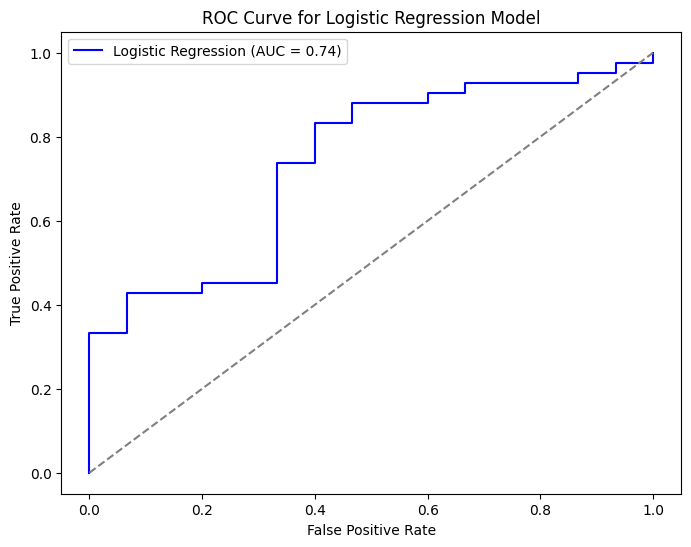

In [15]:
import matplotlib.pyplot as plt # Import pyplot
from sklearn.metrics import roc_curve # Import roc_curve

fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"Logistic Regression (AUC = {auc:.2f})", color="blue")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")  # 参考线
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Logistic Regression Model")
plt.legend()
plt.show()

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve

# 读取基因表达数据集
df = pd.read_csv("gse21374.csv")  # 请修改为你的数据文件路径

# 确保目标变量 (1=排斥, 0=非排斥)
df["Label"] = df["Rejection Status"].apply(lambda x: 1 if x in ["nonrej"] else 0)

# 选择特征列（仅使用指定的 3 个基因）
selected_genes = ["WDR3", "LOC100507073", "SCMH1"]
X_selected = df[selected_genes]  # 仅保留选定基因
y = df["Label"]

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42, stratify=y)

# 训练逻辑回归模型
log_reg = LogisticRegression(solver='liblinear', random_state=42)
log_reg.fit(X_train, y_train)

# 进行预测
y_pred = log_reg.predict(X_test)
y_pred_prob = log_reg.predict_proba(X_test)[:, 1]

# 计算模型评估指标
accuracy = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_prob)

# 输出结果
print(f"Accuracy of logistic regression model: {accuracy:.4f}")
print(f"Logistic regression model AUC: {auc:.4f}")

Accuracy of logistic regression model: 0.7368
Logistic regression model AUC: 0.5095


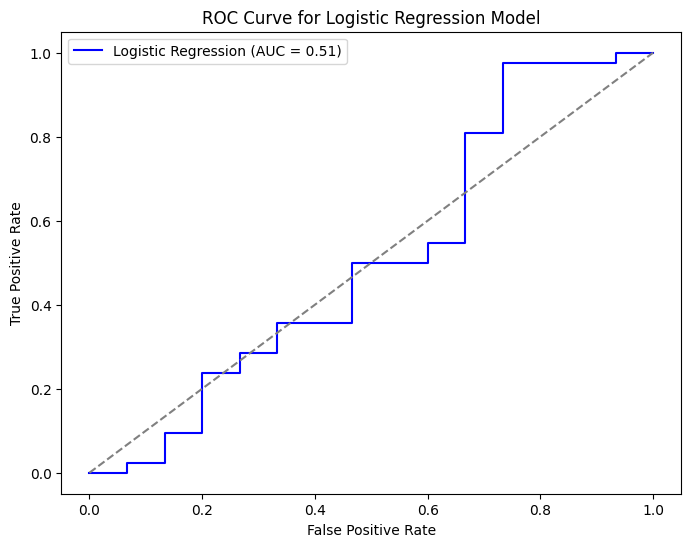

In [10]:
import matplotlib.pyplot as plt # Import pyplot
from sklearn.metrics import roc_curve # Import roc_curve

fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"Logistic Regression (AUC = {auc:.2f})", color="blue")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")  # 参考线
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Logistic Regression Model")
plt.legend()
plt.show()

In [1]:
import pandas as pd

# 读取CSV文件
df = pd.read_csv('gse21374.csv')  # 替换为你的文件名

# 显示前五行数据
print(df.head())

  Unnamed: 0  DDR1 /// MIR4640      RFC2     HSPA6       PAX8    GUCA1A  \
0  GSM533921          9.977242  6.600568  5.785312  10.792120  3.136564   
1  GSM533922         10.528307  6.488367  5.658249  10.973320  3.228242   
2  GSM533923         10.676130  6.651939  5.856184  10.669966  2.907612   
3  GSM533924          9.586508  6.141822  5.866988  10.342068  3.091361   
4  GSM533925          9.979894  6.097477  5.563888  10.622161  3.055088   

   MIR5193 /// UBA7      THRA    PTPN21      CCL5  ...  AFFX-r2-Ec-bioB-3_at  \
0          7.374997  5.140061  5.069820  6.536344  ...              8.531635   
1          7.581415  5.416706  4.873167  6.463633  ...              8.734464   
2          8.281132  5.269089  4.669336  8.707918  ...              8.376691   
3          7.753586  5.319843  4.795367  6.231689  ...              8.457440   
4          7.230532  5.203597  4.984110  5.227120  ...              8.204733   

   AFFX-r2-Ec-bioB-5_at  AFFX-r2-Ec-bioB-M_at  AFFX-r2-Ec-bioC-3_at 

In [2]:
df

,Unnamed: 0,DDR1 /// MIR4640,RFC2,HSPA6,PAX8,GUCA1A,MIR5193 /// UBA7,THRA,PTPN21,CCL5,...,AFFX-r2-Ec-bioB-3_at,AFFX-r2-Ec-bioB-5_at,AFFX-r2-Ec-bioB-M_at,AFFX-r2-Ec-bioC-3_at,AFFX-r2-Ec-bioC-5_at,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,Rejection Status
0,GSM533921,9.977242,6.600568,5.785312,10.792120,3.136564,7.374997,5.140061,5.069820,6.536344,...,8.531635,8.459645,8.269925,9.848628,9.559851,11.928238,11.583730,13.653370,13.386179,nonrej
1,GSM533922,10.528307,6.488367,5.658249,10.973320,3.228242,7.581415,5.416706,4.873167,6.463633,...,8.734464,8.747167,8.409865,10.177910,9.784476,12.336352,11.898083,13.843765,13.632752,nonrej
2,GSM533923,10.676130,6.651939,5.856184,10.669966,2.907612,8.281132,5.269089,4.669336,8.707918,...,8.376691,8.384332,8.132519,10.046965,9.569640,12.116085,11.832005,13.667481,13.378050,nonrej
3,GSM533924,9.586508,6.141822,5.866988,10.342068,3.091361,7.753586,5.319843,4.795367,6.231689,...,8.457440,8.078330,7.824382,10.106060,9.697052,12.001332,11.741060,13.485789,13.207374,nonrej
4,GSM533925,9.979894,6.097477,5.563888,10.622161,3.055088,7.230532,5.203597,4.984110,5.227120,...,8.204733,7.874217,7.472743,9.727984,9.370505,11.958363,11.536944,13.471246,13.135800,nonrej
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,GSM534198,9.915120,6.624997,5.568316,10.438484,3.103627,7.818179,5.421174,5.126141,6.215026,...,7.993118,7.674132,7.387992,9.462764,9.072026,11.555894,11.048639,13.232026,12.899544,nonrej
278,GSM534199,10.144107,6.357931,5.652100,10.353695,3.146691,8.059700,5.402151,4.818083,8.423771,...,8.000036,7.573051,7.360223,9.429183,9.008347,11.632159,11.113692,13.221589,12.937811,rej
279,GSM534200,10.561913,6.496042,5.696330,11.125695,3.236582,8.156774,5.411519,5.139511,5.891711,...,8.167168,8.010875,7.881892,9.540081,9.151547,11.830302,11.330476,13.428277,13.152557,nonrej
280,GSM534201,10.179040,6.318934,6.072288,10.237774,3.112964,7.913483,5.462635,5.399999,8.669699,...,8.556826,8.365313,8.160081,10.020628,9.670360,12.130981,11.740694,13.662238,13.427396,nonrej


In [4]:
from sklearn.model_selection import train_test_split
# 创建一个新的二分类标签列
df["Label"] = df["Rejection Status"].apply(lambda x: 1 if x in ["nonrej"] else 0)

# 选出特征（去掉 Diagnosis 和 Label 列）
X = df.drop(columns=["Rejection Status", "Label", "Unnamed: 0"])
y = df["Label"]

# 划分训练集和测试集 (80% 训练, 20% 测试)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                                                                        test_size=0.3,
                                                    random_state=42,
                                                    stratify=y)  # 保持分类比例一致

In [5]:
from sklearn.ensemble import RandomForestClassifier

# 创建随机森林分类器
rf = RandomForestClassifier(n_estimators=500,
                            random_state=42,
                            n_jobs=-1)  # 使用所有CPU加速训练

# 训练模型
rf.fit(X_train, y_train)

# 在测试集上评估
accuracy = rf.score(X_test, y_test)
print(f"随机森林模型在测试集上的准确率: {accuracy:.4f}")

随机森林模型在测试集上的准确率: 0.7882


In [7]:
from sklearn.preprocessing import StandardScaler
X = df.drop(columns=["Rejection Status", "Label", "Unnamed: 0"])
y = df["Label"]

# 分割数据为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 标准化数据
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
# 获取特征重要性
feature_importances = rf.feature_importances_

# 创建 DataFrame
importance_df = pd.DataFrame({"Gene": X.columns, "Importance": feature_importances})

# 按重要性排序
importance_df = importance_df.sort_values(by="Importance", ascending=False)

# 取最重要的前 20 个基因
top_30_genes = importance_df.head(30)

print("随机森林筛选出的前 30 个重要基因:")
print(top_30_genes)

# 保存到 CSV
top_30_genes.to_csv("21374_top_30_genes_rf.csv", index=False)
print("已保存重要基因到 'top_30_genes_rf.csv'")

随机森林筛选出的前 30 个重要基因:
                                                    Gene  Importance
47974                                             IRF1.1    0.004550
38691                                MIR155 /// MIR155HG    0.004412
35730                                              NLRC5    0.004353
15205                                               CD8A    0.003863
18726  HLA-DQB1 /// HLA-DRB1 /// HLA-DRB4 /// HLA-DRB...    0.003264
27218                                               LAP3    0.003131
47830                                             GBP5.1    0.002770
12196                                               GBP2    0.002669
22716                                              CLIC2    0.002619
13733                                           PMAIP1.1    0.002588
2621                                           PSMB8-AS1    0.002543
10077                                             WARS.1    0.002368
23758                                            HLA-C.2    0.002269
19178         

In [9]:
## Lasso
from sklearn.linear_model import LogisticRegression  # Import LogisticRegression
lasso = LogisticRegression(penalty='l1', solver='liblinear', C=0.1, max_iter=5000) # Create a Lasso regression object

lasso.fit(X, y)  # 训练模型
coef = lasso.coef_[0]
# 提取非零系数对应的基因
lasso_importance = pd.Series(coef, index=X.columns).abs().sort_values(ascending=False)

# 获取前 20 个基因
top_genes_lasso = lasso_importance.head(30)
#Rename the index instead of using columns
top_genes_lasso = top_genes_lasso.rename_axis("Gene").reset_index(name="Importance")
#top_genes_lasso.index.name = "Gene" # another way to rename index

print("Lasso 逻辑回归前 30 重要基因:")
print(top_genes_lasso)

# 保存到 CSV
top_genes_lasso.to_csv("21374_top_genes_lasso.csv", header=True, index=False) #avoid having an extra index column

Lasso 逻辑回归前 30 重要基因:
                   Gene  Importance
0                PRR14L    0.148853
1              ADAMDEC1    0.093490
2                CXCL11    0.078848
3                CXCL13    0.074810
4              CXCL11.1    0.054037
5               IL13RA2    0.053020
6                 MMRN1    0.047464
7              FCER1A.1    0.046530
8           RP1-93H18.6    0.043826
9              ADAM12.4    0.034263
10               GBP2.1    0.030775
11  MIR155 /// MIR155HG    0.028603
12             FLJ35700    0.028133
13            LINC00844    0.025658
14                 AGR2    0.024810
15                 CD69    0.024560
16             ADAM12.2    0.023788
17                 MYL2    0.023599
18               GBP5.1    0.023075
19            235229_at    0.022632
20                 LIX1    0.022614
21    FCGR3A /// FCGR3B    0.021538
22            237587_at    0.020598
23           SERPINB6.2    0.020509
24                CXCL9    0.020439
25               GBP1.1    0.018679
26     

In [10]:
## XGboost
import xgboost as xgb
import pandas as pd
from sklearn.model_selection import train_test_split
X_train.columns = X_train.columns.str.replace(r"[\[\]<>]", "", regex=True)
X_test.columns = X_test.columns.str.replace(r"[\[\]<>]", "", regex=True)
# 训练 XGBoost 模型
xgb_model = xgb.XGBClassifier(n_estimators=500, random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

# 提取基因重要性
feature_importance_xgb = pd.Series(xgb_model.feature_importances_, index=X.columns).sort_values(ascending=False)

# 获取前 20 个基因
top_genes_xgb = feature_importance_xgb.head(30)

# 转换为 DataFrame 并保存
top_genes_xgb_df = pd.DataFrame({"Gene": top_genes_xgb.index, "Importance": top_genes_xgb.values})
top_genes_xgb_df.to_csv("21374_top_genes_xgb.csv", index=False)

# 显示 XGBoost 筛选的前 20 个基因
print("XGBoost 筛选出的前 20 个重要基因:")
print(top_genes_xgb_df)

C:\Users\ajxxs\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:158: UserWarning: [21:28:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost 筛选出的前 20 个重要基因:
                     Gene  Importance
0          GABBR1 /// UBD    0.192077
1   HLA-DRB1 /// HLA-DRB1    0.056662
2               236383_at    0.052218
3            LOC101926960    0.046588
4               222366_at    0.039983
5                ZNF618.1    0.036392
6               236794_at    0.035674
7               235229_at    0.032566
8            LOC100129884    0.029933
9                   CLIC2    0.024312
10                PEBP1.1    0.021300
11       IPO11 /// LRRC70    0.021216
12            RP1-93H18.6    0.018324
13                FAM3C.1    0.017620
14              235739_at    0.017275
15              243827_at    0.016422
16                   CLK2    0.014336
17              244218_at    0.013452
18           1558600_a_at    0.012390
19               ZNF704.4    0.012261
20              237232_at    0.010302
21             SLC25A45.1    0.010097
22            EPHA1-AS1.1    0.009775
23                SDCCAG8    0.009435
24                    TTK 